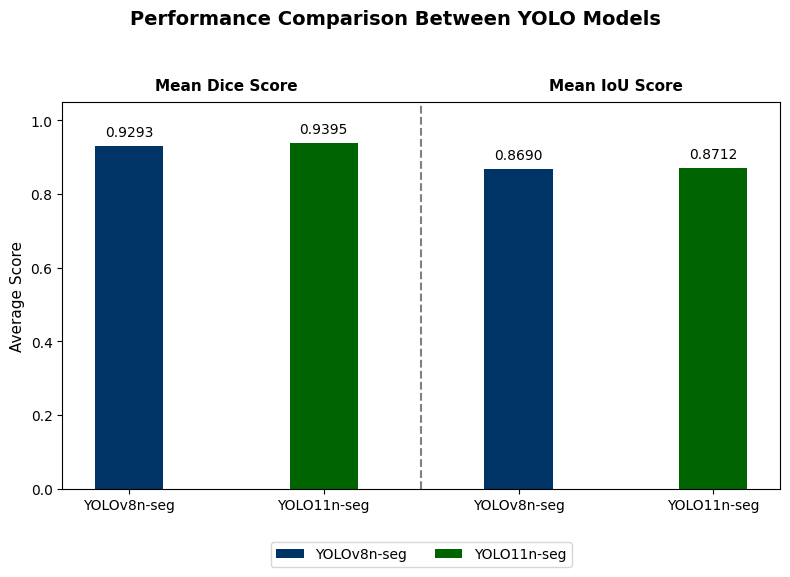

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model data
model_names = ['YOLOv8n-seg', 'YOLO11n-seg']
dice_scores = [0.9293, 0.9395]
iou_scores = [0.8690, 0.8712]

# Bar width
bar_width = 0.35

# Bar positions
x_dice = np.array([0, 1])
x_iou = x_dice + 2  # reduced spacing between sections

# Dark colors
colors = {
    'YOLOv8n-seg': '#003366',
    'YOLO11n-seg': '#006400',
}

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))  # slightly narrower figure

# Dice bars
bar_dice_v8 = ax.bar(x_dice[0], dice_scores[0], width=bar_width, color=colors['YOLOv8n-seg'], label='YOLOv8n-seg')
bar_dice_v11 = ax.bar(x_dice[1], dice_scores[1], width=bar_width, color=colors['YOLO11n-seg'], label='YOLO11n-seg')

# IoU bars
bar_iou_v8 = ax.bar(x_iou[0], iou_scores[0], width=bar_width, color=colors['YOLOv8n-seg'])
bar_iou_v11 = ax.bar(x_iou[1], iou_scores[1], width=bar_width, color=colors['YOLO11n-seg'])

# Axes and ticks
ax.set_ylim(0, 1.05)
ax.set_ylabel('Average Score', fontsize=11)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(['YOLOv8n-seg', 'YOLO11n-seg', 'YOLOv8n-seg', 'YOLO11n-seg'])

# Vertical separator line
ax.axvline(x=1.5, color='gray', linestyle='--')

# Title
plt.suptitle('Performance Comparison Between YOLO Models', fontsize=14, fontweight='bold', y=0.97)

# Section titles
center_dice = np.mean(x_dice)
center_iou = np.mean(x_iou)

ax.text(center_dice, 1.03, 'Mean Dice Score', ha='center', fontsize=11, fontweight='bold', transform=ax.get_xaxis_transform())
ax.text(center_iou, 1.03, 'Mean IoU Score', ha='center', fontsize=11, fontweight='bold', transform=ax.get_xaxis_transform())

# Annotate bar values with more precision
for bar in [bar_dice_v8, bar_dice_v11, bar_iou_v8, bar_iou_v11]:
    for b in bar:
        height = b.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(b.get_x() + b.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom')

# Legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.94])

# Salva e mostra o gráfico
plt.savefig('comparacao_yolo.png', dpi=300, bbox_inches='tight')
plt.show()

# Faz o download da imagem no Colab
from google.colab import files
files.download('comparacao_yolo.png')

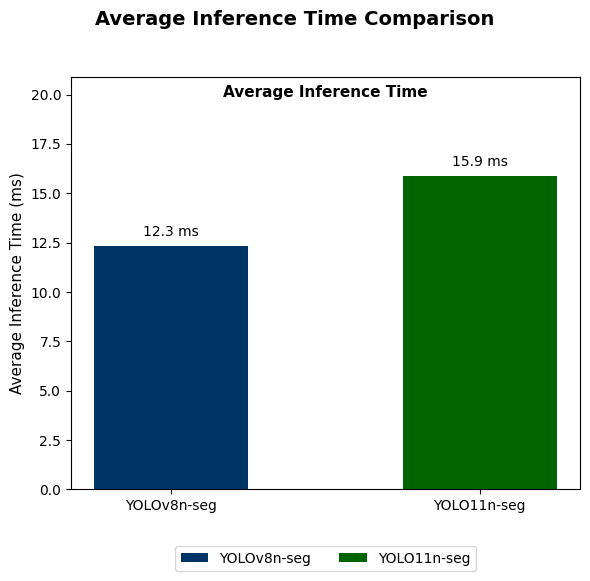

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model data
model_names = ['YOLOv8n-seg', 'YOLO11n-seg']
inference_times = [12.31, 15.89]  # in milliseconds

# Bar width
bar_width = 0.5
x_pos = np.arange(len(model_names))

# Dark colors
colors = {
    'YOLOv8n-seg': '#003366',
    'YOLO11n-seg': '#006400',
}

# Create plot
fig, ax = plt.subplots(figsize=(6, 6))

# Bars
bars = []
for i, model in enumerate(model_names):
    bar = ax.bar(x_pos[i], inference_times[i], width=bar_width, color=colors[model], label=model)
    bars.append(bar)

# Axes
ax.set_ylabel('Average Inference Time (ms)', fontsize=11)
ax.set_ylim(0, max(inference_times) + 5)
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names)

# Title
plt.suptitle('Average Inference Time Comparison', fontsize=14, fontweight='bold', y=0.97)

# Section label above bars
ax.text(np.mean(x_pos), max(inference_times) + 4, 'Average Inference Time',
        ha='center', fontsize=11, fontweight='bold')

# Annotate bar values
for bar_group in bars:
    for b in bar_group:
        height = b.get_height()
        ax.annotate(f'{height:.1f} ms',
                    xy=(b.get_x() + b.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords='offset points',
                    ha='center', va='bottom')

# Legend (automatic from bar labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2)

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()

In [ ]:
import pandas as pd

# Dados dos modelos e seus tempos médios de inferência
data = {
    'Model': ['YOLOv8n-seg', 'YOLO11n-seg'],
    'Average Inference Time (ms)': [18.4, 22.7]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Exibir a tabela
print(df.to_string(index=False))


      Model  Average Inference Time (ms)
YOLOv8n-seg                         18.4
YOLO11n-seg                         22.7


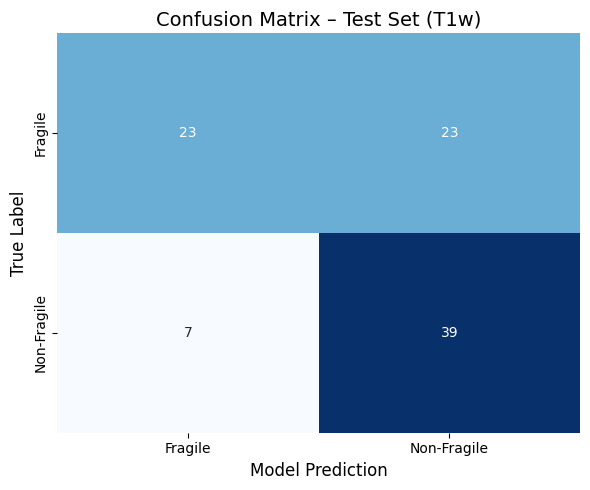

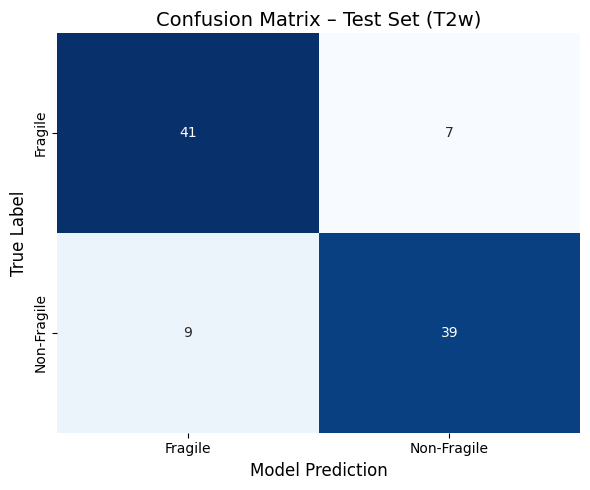

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define as duas matrizes de confusão
cm1 = np.array([[23, 23],
                [7,  39]])

cm2 = np.array([[41, 7],
                [9,  39]])

# Define os rótulos
labels = ['Fragile', 'Non-Fragile']

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Model Prediction', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

# Plot das duas matrizes
plot_confusion_matrix(cm1, 'Confusion Matrix – Test Set (T1w)')
plot_confusion_matrix(cm2, 'Confusion Matrix – Test Set (T2w)')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# Define as duas matrizes de confusão
cm1 = np.array([[23, 23],
                [7,  39]])

cm2 = np.array([[41, 7],
                [9,  39]])

labels = ['Fragile', 'Non-Fragile']

def plot_and_save_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Model Prediction', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title(title, fontsize=14)
    plt.tight_layout()

    # Salva o arquivo como PNG
    plt.savefig(filename, dpi=300)
    plt.close()  # Fecha a figura para evitar sobreposição

    # Faz o download
    files.download(filename)

# Gera e baixa as duas matrizes
plot_and_save_confusion_matrix(cm1, 'Confusion Matrix – Test Set (T1w)', 'confusion_matrix_model1.png')
plot_and_save_confusion_matrix(cm2, 'Confusion Matrix – Test Set (T2w)', 'confusion_matrix_model2.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

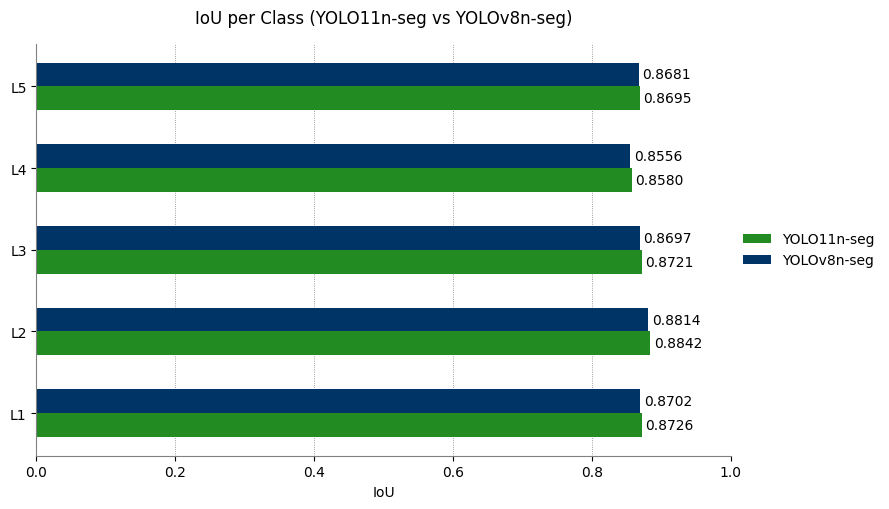

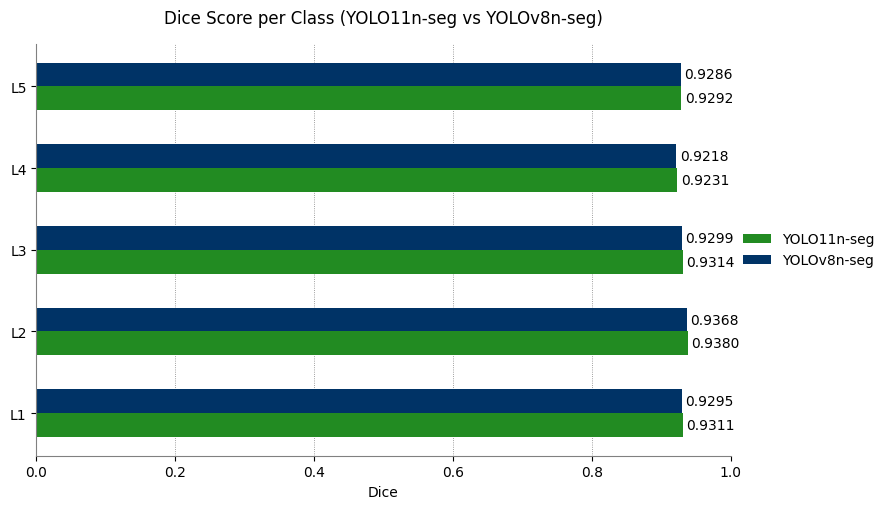

Type 'ok' to save figures and download: ok
Figures saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# === NOMES DOS MODELOS ===
model_names = ['YOLO11n-seg', 'YOLOv8n-seg']
bar_colors = ['#228B22', '#003366']  # verde (YOLO11n), azul (YOLOv8n)

# === DADOS ===
class_labels = ['L1', 'L2', 'L3', 'L4', 'L5']

iou_scores_model1 = [0.8726, 0.8842, 0.8721, 0.8580, 0.8695]  # YOLO11n
iou_scores_model2 = [0.8702, 0.8814, 0.8697, 0.8556, 0.8681]  # YOLOv8n

dice_scores_model1 = [0.9311, 0.9380, 0.9314, 0.9231, 0.9292]  # YOLO11n
dice_scores_model2 = [0.9295, 0.9368, 0.9299, 0.9218, 0.9286]  # YOLOv8n

# === CONFIGURAÇÕES ===
font_size = 10
bar_height = 0.35
group_spacing = 1.2  # espaçamento entre as classes
plt.rc('font', family='DejaVu Sans', size=font_size)

def plot_grouped_bar(values_model1, values_model2, labels, title, metric, filename):
    n = len(labels)
    y_pos = np.arange(n) * group_spacing

    fig, ax = plt.subplots(figsize=(9, 5.2))

    # Barras lado a lado
    ax.barh(y_pos - bar_height / 2, values_model1, height=bar_height, color=bar_colors[0], label=model_names[0])
    ax.barh(y_pos + bar_height / 2, values_model2, height=bar_height, color=bar_colors[1], label=model_names[1])

    # Anotações numéricas
    for i in range(n):
        ax.text(values_model1[i] + 0.005, y_pos[i] - bar_height / 2, f"{values_model1[i]:.4f}", va='center', ha='left')
        ax.text(values_model2[i] + 0.005, y_pos[i] + bar_height / 2, f"{values_model2[i]:.4f}", va='center', ha='left')

    # Estilo e eixos
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.set_xlabel(metric)
    ax.set_title(title, pad=15)
    ax.set_xlim(0, 1.0)
    ax.spines[['top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_color('gray')
    ax.xaxis.grid(True, linestyle=':', color='gray', linewidth=0.6)
    ax.set_axisbelow(True)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
    plt.tight_layout()
    plt.show()
    return fig, filename

# === GERAR GRÁFICOS ===
fig1, f1 = plot_grouped_bar(iou_scores_model1, iou_scores_model2, class_labels,
                            'IoU per Class (YOLO11n-seg vs YOLOv8n-seg)', 'IoU', 'iou_comparison.png')

fig2, f2 = plot_grouped_bar(dice_scores_model1, dice_scores_model2, class_labels,
                            'Dice Score per Class (YOLO11n-seg vs YOLOv8n-seg)', 'Dice', 'dice_comparison.png')

# === SALVAR E BAIXAR ===
if input("Type 'ok' to save figures and download: ").strip().lower() == 'ok':
    fig1.savefig(f1, dpi=300)
    fig2.savefig(f2, dpi=300)
    print("Figures saved.")
    files.download(f1)
    files.download(f2)
else:
    print("Figures not saved.")
